In [2]:
# 参考
# https://www.kaggle.com/code/alfredmaboa/personality-profile-prediction-team-01/notebook

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [6]:
data = pd.read_csv('./data/csv/mbti_1.csv')
train_data, test_data=train_test_split(data,test_size=0.2,random_state=42,stratify=data.type)

In [7]:
train_data.head()

,type,posts
8331,INFP,'this is actually exactly what i expected! :l...
1290,ISTP,"'Nope. Not now, not ever. I'm too busy with ..."
1982,ENFJ,'Yes peace is the absence of conflict - your I...
769,INFP,"'I apologize for the delayed response, but tha..."
8339,INFP,"'Nightglow, I can't even imagine what you must..."


In [8]:
test_data.head()

,type,posts
7814,INFP,"'Macona , it depends if the big family has ext..."
2233,ENFJ,https://www.youtube.com/watch?v=cfg4SC9Nics|||...
7261,INFJ,'@ Heylena. Lol! Compliment accepted. Thank ...
7794,INFJ,"'2pac right|||??? rocket coffin, like packed w..."
2950,INTJ,'The title of this thread is misleading; there...


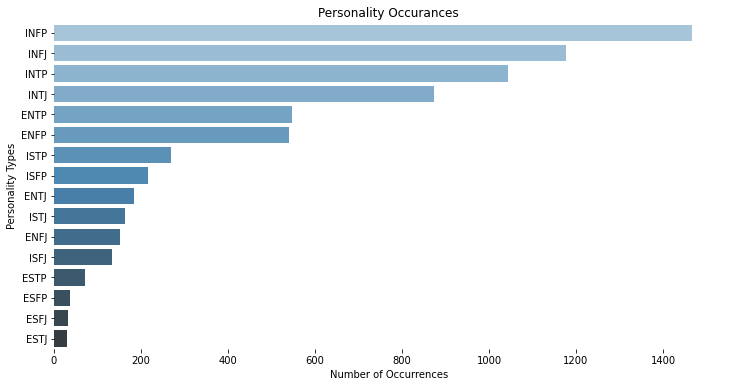

In [10]:
# visualise the occurances/distribution of all the class types.
num_c = train_data['type'].value_counts()
f, ax = plt.subplots(figsize=(12,6))
sns.barplot( num_c.values, num_c.index, palette="Blues_d")
ax.xaxis.grid(False)
ax.set(xlabel="Number of Occurrences")
ax.set(ylabel="Personality Types")
ax.set(title="Personality Occurances")
sns.despine(trim=True, left=True, bottom=True)

In [11]:
# drop the  'Id' colum since it's unnecessary for the prediction process.
train_type = train_data[['type']]
test_ID = test_data['id']
train_data.drop(['type'], axis=1, inplace=True)
test_data.drop(['id'], axis=1, inplace=True)

KeyError: 'id'